In [1]:
#-*- coding: utf-8 -*-
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from sklearn.model_selection import train_test_split

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

In [2]:
# 데이터 로드
df = pd.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = df.values
dataset.shape

(506, 14)

In [3]:
# 데이터 분리
X = dataset[:, 0:13]
Y = dataset[:, 13]

# train, test 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [4]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))  # 입력층
                                                       # 은닉층1
model.add(Dense(25, activation='relu'))    
model.add(Dense(15, activation='relu'))            
model.add(Dense(6, activation='relu'))                 # 
model.add(Dense(1))                                    # 출력층
# 선형 회귀는 마지막에 참과 거짓을 구분할 필요가 없음. 출력층에 활성화 함수를 지정할 필요도 없음

model.compile(loss='mean_squared_error',
              optimizer='adam', 
              metrics=['mse'])

In [5]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_mse', verbose=1, save_best_only=True)

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_mse', patience=100)

In [6]:
# 모델 학습
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=5000, batch_size=30, verbose=1, callbacks=[early_stopping_callback, checkpointer])

Epoch 1/5000
8/8 [==============================] - 1s 39ms/step - loss: 339.4776 - mse: 339.4776 - val_loss: 168.2521 - val_mse: 168.2521

Epoch 00001: val_mse improved from inf to 168.25214, saving model to ./model\01-168.2521.hdf5
Epoch 2/5000
8/8 [==============================] - 0s 7ms/step - loss: 90.6869 - mse: 90.6869 - val_loss: 100.6497 - val_mse: 100.6497

Epoch 00002: val_mse improved from 168.25214 to 100.64969, saving model to ./model\02-100.6497.hdf5
Epoch 3/5000
8/8 [==============================] - 0s 7ms/step - loss: 83.5105 - mse: 83.5105 - val_loss: 82.3979 - val_mse: 82.3979

Epoch 00003: val_mse improved from 100.64969 to 82.39790, saving model to ./model\03-82.3979.hdf5
Epoch 4/5000
8/8 [==============================] - 0s 7ms/step - loss: 72.5968 - mse: 72.5968 - val_loss: 71.6018 - val_mse: 71.6018

Epoch 00004: val_mse improved from 82.39790 to 71.60178, saving model to ./model\04-71.6018.hdf5
Epoch 5/5000
8/8 [==============================] - 0s 7ms/step 


Epoch 00039: val_mse improved from 56.05079 to 54.77090, saving model to ./model\39-54.7709.hdf5
Epoch 40/5000
8/8 [==============================] - 0s 7ms/step - loss: 48.1160 - mse: 48.1160 - val_loss: 56.6634 - val_mse: 56.6634

Epoch 00040: val_mse did not improve from 54.77090
Epoch 41/5000
8/8 [==============================] - 0s 6ms/step - loss: 47.8914 - mse: 47.8914 - val_loss: 53.3043 - val_mse: 53.3043

Epoch 00041: val_mse improved from 54.77090 to 53.30428, saving model to ./model\41-53.3043.hdf5
Epoch 42/5000
8/8 [==============================] - 0s 6ms/step - loss: 47.0770 - mse: 47.0770 - val_loss: 53.5172 - val_mse: 53.5172

Epoch 00042: val_mse did not improve from 53.30428
Epoch 43/5000
8/8 [==============================] - 0s 7ms/step - loss: 45.9975 - mse: 45.9975 - val_loss: 53.9349 - val_mse: 53.9349

Epoch 00043: val_mse did not improve from 53.30428
Epoch 44/5000
8/8 [==============================] - 0s 6ms/step - loss: 45.2546 - mse: 45.2546 - val_loss: 

8/8 [==============================] - 0s 6ms/step - loss: 30.4208 - mse: 30.4208 - val_loss: 38.3691 - val_mse: 38.3691

Epoch 00078: val_mse improved from 38.46549 to 38.36909, saving model to ./model\78-38.3691.hdf5
Epoch 79/5000
8/8 [==============================] - 0s 6ms/step - loss: 32.3228 - mse: 32.3228 - val_loss: 38.4501 - val_mse: 38.4501

Epoch 00079: val_mse did not improve from 38.36909
Epoch 80/5000
8/8 [==============================] - 0s 17ms/step - loss: 30.7332 - mse: 30.7332 - val_loss: 38.7487 - val_mse: 38.7487

Epoch 00080: val_mse did not improve from 38.36909
Epoch 81/5000
8/8 [==============================] - 0s 10ms/step - loss: 30.2164 - mse: 30.2164 - val_loss: 40.0802 - val_mse: 40.0802

Epoch 00081: val_mse did not improve from 38.36909
Epoch 82/5000
8/8 [==============================] - 0s 8ms/step - loss: 33.2748 - mse: 33.2748 - val_loss: 39.6051 - val_mse: 39.6051

Epoch 00082: val_mse did not improve from 38.36909
Epoch 83/5000
8/8 [============

8/8 [==============================] - 0s 6ms/step - loss: 25.3295 - mse: 25.3295 - val_loss: 34.2525 - val_mse: 34.2525

Epoch 00119: val_mse did not improve from 32.54177
Epoch 120/5000
8/8 [==============================] - 0s 6ms/step - loss: 30.1785 - mse: 30.1785 - val_loss: 35.6934 - val_mse: 35.6934

Epoch 00120: val_mse did not improve from 32.54177
Epoch 121/5000
8/8 [==============================] - 0s 6ms/step - loss: 24.6017 - mse: 24.6017 - val_loss: 34.2415 - val_mse: 34.2415

Epoch 00121: val_mse did not improve from 32.54177
Epoch 122/5000
8/8 [==============================] - 0s 6ms/step - loss: 25.0921 - mse: 25.0921 - val_loss: 31.8830 - val_mse: 31.8830

Epoch 00122: val_mse improved from 32.54177 to 31.88302, saving model to ./model\122-31.8830.hdf5
Epoch 123/5000
8/8 [==============================] - 0s 5ms/step - loss: 23.4475 - mse: 23.4475 - val_loss: 39.8388 - val_mse: 39.8388

Epoch 00123: val_mse did not improve from 31.88302
Epoch 124/5000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 21.2276 - mse: 21.2276 - val_loss: 31.2804 - val_mse: 31.2804

Epoch 00161: val_mse did not improve from 30.59398
Epoch 162/5000
8/8 [==============================] - 0s 5ms/step - loss: 20.2534 - mse: 20.2534 - val_loss: 31.4294 - val_mse: 31.4294

Epoch 00162: val_mse did not improve from 30.59398
Epoch 163/5000
8/8 [==============================] - 0s 5ms/step - loss: 20.4814 - mse: 20.4814 - val_loss: 34.6086 - val_mse: 34.6086

Epoch 00163: val_mse did not improve from 30.59398
Epoch 164/5000
8/8 [==============================] - 0s 5ms/step - loss: 21.6493 - mse: 21.6493 - val_loss: 31.9085 - val_mse: 31.9085

Epoch 00164: val_mse did not improve from 30.59398
Epoch 165/5000
8/8 [==============================] - 0s 6ms/step - loss: 21.7530 - mse: 21.7530 - val_loss: 30.7826 - val_mse: 30.7826

Epoch 00165: val_mse did not improve from 30.59398
Epoch 166/5000
8/8 [==============================] - 0s 6ms/step - loss: 2

8/8 [==============================] - 0s 10ms/step - loss: 25.8832 - mse: 25.8832 - val_loss: 34.7911 - val_mse: 34.7911

Epoch 00203: val_mse did not improve from 29.93481
Epoch 204/5000
8/8 [==============================] - 0s 7ms/step - loss: 23.9043 - mse: 23.9043 - val_loss: 33.3966 - val_mse: 33.3966

Epoch 00204: val_mse did not improve from 29.93481
Epoch 205/5000
8/8 [==============================] - 0s 6ms/step - loss: 19.3265 - mse: 19.3265 - val_loss: 32.1278 - val_mse: 32.1278

Epoch 00205: val_mse did not improve from 29.93481
Epoch 206/5000
8/8 [==============================] - 0s 6ms/step - loss: 19.6620 - mse: 19.6620 - val_loss: 32.1176 - val_mse: 32.1176

Epoch 00206: val_mse did not improve from 29.93481
Epoch 207/5000
8/8 [==============================] - 0s 5ms/step - loss: 19.1892 - mse: 19.1892 - val_loss: 31.0732 - val_mse: 31.0732

Epoch 00207: val_mse did not improve from 29.93481
Epoch 208/5000
8/8 [==============================] - 0s 6ms/step - loss: 

8/8 [==============================] - 0s 6ms/step - loss: 16.8028 - mse: 16.8028 - val_loss: 27.3193 - val_mse: 27.3193

Epoch 00244: val_mse improved from 27.75266 to 27.31926, saving model to ./model\244-27.3193.hdf5
Epoch 245/5000
8/8 [==============================] - 0s 6ms/step - loss: 16.3938 - mse: 16.3938 - val_loss: 28.5121 - val_mse: 28.5121

Epoch 00245: val_mse did not improve from 27.31926
Epoch 246/5000
8/8 [==============================] - 0s 5ms/step - loss: 17.4780 - mse: 17.4780 - val_loss: 28.6574 - val_mse: 28.6574

Epoch 00246: val_mse did not improve from 27.31926
Epoch 247/5000
8/8 [==============================] - 0s 6ms/step - loss: 17.3319 - mse: 17.3319 - val_loss: 27.5320 - val_mse: 27.5320

Epoch 00247: val_mse did not improve from 27.31926
Epoch 248/5000
8/8 [==============================] - 0s 6ms/step - loss: 16.7507 - mse: 16.7507 - val_loss: 28.6285 - val_mse: 28.6285

Epoch 00248: val_mse did not improve from 27.31926
Epoch 249/5000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 15.2027 - mse: 15.2027 - val_loss: 26.5348 - val_mse: 26.5348

Epoch 00286: val_mse did not improve from 25.24203
Epoch 287/5000
8/8 [==============================] - 0s 6ms/step - loss: 16.3906 - mse: 16.3906 - val_loss: 30.1408 - val_mse: 30.1408

Epoch 00287: val_mse did not improve from 25.24203
Epoch 288/5000
8/8 [==============================] - 0s 6ms/step - loss: 16.3649 - mse: 16.3649 - val_loss: 27.3493 - val_mse: 27.3493

Epoch 00288: val_mse did not improve from 25.24203
Epoch 289/5000
8/8 [==============================] - 0s 6ms/step - loss: 16.9911 - mse: 16.9911 - val_loss: 27.6910 - val_mse: 27.6910

Epoch 00289: val_mse did not improve from 25.24203
Epoch 290/5000
8/8 [==============================] - 0s 6ms/step - loss: 17.3464 - mse: 17.3464 - val_loss: 25.5974 - val_mse: 25.5974

Epoch 00290: val_mse did not improve from 25.24203
Epoch 291/5000
8/8 [==============================] - 0s 5ms/step - loss: 1

8/8 [==============================] - 0s 7ms/step - loss: 15.0083 - mse: 15.0083 - val_loss: 26.6937 - val_mse: 26.6937

Epoch 00328: val_mse did not improve from 24.03423
Epoch 329/5000
8/8 [==============================] - 0s 5ms/step - loss: 15.3639 - mse: 15.3639 - val_loss: 23.4999 - val_mse: 23.4999

Epoch 00329: val_mse improved from 24.03423 to 23.49988, saving model to ./model\329-23.4999.hdf5
Epoch 330/5000
8/8 [==============================] - 0s 6ms/step - loss: 14.1409 - mse: 14.1409 - val_loss: 24.0367 - val_mse: 24.0367

Epoch 00330: val_mse did not improve from 23.49988
Epoch 331/5000
8/8 [==============================] - 0s 7ms/step - loss: 14.0109 - mse: 14.0109 - val_loss: 23.9280 - val_mse: 23.9280

Epoch 00331: val_mse did not improve from 23.49988
Epoch 332/5000
8/8 [==============================] - 0s 8ms/step - loss: 13.8802 - mse: 13.8802 - val_loss: 23.4121 - val_mse: 23.4121

Epoch 00332: val_mse improved from 23.49988 to 23.41206, saving model to ./mode


Epoch 00370: val_mse did not improve from 22.95407
Epoch 371/5000
8/8 [==============================] - 0s 9ms/step - loss: 17.5397 - mse: 17.5397 - val_loss: 26.2996 - val_mse: 26.2996

Epoch 00371: val_mse did not improve from 22.95407
Epoch 372/5000
8/8 [==============================] - 0s 7ms/step - loss: 22.4581 - mse: 22.4581 - val_loss: 25.0593 - val_mse: 25.0593

Epoch 00372: val_mse did not improve from 22.95407
Epoch 373/5000
8/8 [==============================] - 0s 7ms/step - loss: 16.8801 - mse: 16.8801 - val_loss: 28.4335 - val_mse: 28.4335

Epoch 00373: val_mse did not improve from 22.95407
Epoch 374/5000
8/8 [==============================] - 0s 6ms/step - loss: 14.9828 - mse: 14.9828 - val_loss: 22.4939 - val_mse: 22.4939

Epoch 00374: val_mse improved from 22.95407 to 22.49389, saving model to ./model\374-22.4939.hdf5
Epoch 375/5000
8/8 [==============================] - 0s 7ms/step - loss: 13.2340 - mse: 13.2340 - val_loss: 24.5401 - val_mse: 24.5401

Epoch 00375:

8/8 [==============================] - 0s 5ms/step - loss: 13.0890 - mse: 13.0890 - val_loss: 22.1992 - val_mse: 22.1992

Epoch 00414: val_mse did not improve from 21.79141
Epoch 415/5000
8/8 [==============================] - 0s 5ms/step - loss: 13.2754 - mse: 13.2754 - val_loss: 22.3986 - val_mse: 22.3986

Epoch 00415: val_mse did not improve from 21.79141
Epoch 416/5000
8/8 [==============================] - 0s 5ms/step - loss: 13.0705 - mse: 13.0705 - val_loss: 23.6215 - val_mse: 23.6215

Epoch 00416: val_mse did not improve from 21.79141
Epoch 417/5000
8/8 [==============================] - 0s 6ms/step - loss: 12.9180 - mse: 12.9180 - val_loss: 22.9973 - val_mse: 22.9973

Epoch 00417: val_mse did not improve from 21.79141
Epoch 418/5000
8/8 [==============================] - 0s 5ms/step - loss: 12.8438 - mse: 12.8438 - val_loss: 23.5417 - val_mse: 23.5417

Epoch 00418: val_mse did not improve from 21.79141
Epoch 419/5000
8/8 [==============================] - 0s 5ms/step - loss: 1

8/8 [==============================] - 0s 7ms/step - loss: 12.7555 - mse: 12.7555 - val_loss: 24.4379 - val_mse: 24.4379

Epoch 00456: val_mse did not improve from 20.23823
Epoch 457/5000
8/8 [==============================] - 0s 6ms/step - loss: 12.9895 - mse: 12.9895 - val_loss: 22.4081 - val_mse: 22.4081

Epoch 00457: val_mse did not improve from 20.23823
Epoch 458/5000
8/8 [==============================] - 0s 6ms/step - loss: 12.1708 - mse: 12.1708 - val_loss: 20.5859 - val_mse: 20.5859

Epoch 00458: val_mse did not improve from 20.23823
Epoch 459/5000
8/8 [==============================] - 0s 5ms/step - loss: 12.2481 - mse: 12.2481 - val_loss: 20.1707 - val_mse: 20.1707

Epoch 00459: val_mse improved from 20.23823 to 20.17067, saving model to ./model\459-20.1707.hdf5
Epoch 460/5000
8/8 [==============================] - 0s 5ms/step - loss: 12.1184 - mse: 12.1184 - val_loss: 22.4787 - val_mse: 22.4787

Epoch 00460: val_mse did not improve from 20.17067
Epoch 461/5000
8/8 [========

8/8 [==============================] - 0s 6ms/step - loss: 11.3683 - mse: 11.3683 - val_loss: 19.6409 - val_mse: 19.6409

Epoch 00498: val_mse did not improve from 18.94436
Epoch 499/5000
8/8 [==============================] - 0s 5ms/step - loss: 11.4445 - mse: 11.4445 - val_loss: 19.8957 - val_mse: 19.8957

Epoch 00499: val_mse did not improve from 18.94436
Epoch 500/5000
8/8 [==============================] - 0s 6ms/step - loss: 11.1550 - mse: 11.1550 - val_loss: 19.2190 - val_mse: 19.2190

Epoch 00500: val_mse did not improve from 18.94436
Epoch 501/5000
8/8 [==============================] - 0s 6ms/step - loss: 12.7801 - mse: 12.7801 - val_loss: 20.2359 - val_mse: 20.2359

Epoch 00501: val_mse did not improve from 18.94436
Epoch 502/5000
8/8 [==============================] - 0s 5ms/step - loss: 11.2424 - mse: 11.2424 - val_loss: 19.1001 - val_mse: 19.1001

Epoch 00502: val_mse did not improve from 18.94436
Epoch 503/5000
8/8 [==============================] - 0s 6ms/step - loss: 1

8/8 [==============================] - 0s 6ms/step - loss: 10.5994 - mse: 10.5994 - val_loss: 19.6673 - val_mse: 19.6673

Epoch 00540: val_mse did not improve from 17.38979
Epoch 541/5000
8/8 [==============================] - 0s 7ms/step - loss: 10.6427 - mse: 10.6427 - val_loss: 19.8348 - val_mse: 19.8348

Epoch 00541: val_mse did not improve from 17.38979
Epoch 542/5000
8/8 [==============================] - 0s 5ms/step - loss: 11.2327 - mse: 11.2327 - val_loss: 20.2674 - val_mse: 20.2674

Epoch 00542: val_mse did not improve from 17.38979
Epoch 543/5000
8/8 [==============================] - 0s 5ms/step - loss: 11.9969 - mse: 11.9969 - val_loss: 18.1959 - val_mse: 18.1959

Epoch 00543: val_mse did not improve from 17.38979
Epoch 544/5000
8/8 [==============================] - 0s 5ms/step - loss: 10.5479 - mse: 10.5479 - val_loss: 17.3596 - val_mse: 17.3596

Epoch 00544: val_mse improved from 17.38979 to 17.35956, saving model to ./model\544-17.3596.hdf5
Epoch 545/5000
8/8 [========


Epoch 00582: val_mse did not improve from 16.56389
Epoch 583/5000
8/8 [==============================] - 0s 6ms/step - loss: 9.9310 - mse: 9.9310 - val_loss: 18.2519 - val_mse: 18.2519

Epoch 00583: val_mse did not improve from 16.56389
Epoch 584/5000
8/8 [==============================] - 0s 6ms/step - loss: 10.8737 - mse: 10.8737 - val_loss: 22.8245 - val_mse: 22.8245

Epoch 00584: val_mse did not improve from 16.56389
Epoch 585/5000
8/8 [==============================] - 0s 6ms/step - loss: 12.5961 - mse: 12.5961 - val_loss: 21.2530 - val_mse: 21.2530

Epoch 00585: val_mse did not improve from 16.56389
Epoch 586/5000
8/8 [==============================] - 0s 6ms/step - loss: 13.6109 - mse: 13.6109 - val_loss: 18.9007 - val_mse: 18.9007

Epoch 00586: val_mse did not improve from 16.56389
Epoch 587/5000
8/8 [==============================] - 0s 7ms/step - loss: 10.1694 - mse: 10.1694 - val_loss: 17.8018 - val_mse: 17.8018

Epoch 00587: val_mse did not improve from 16.56389
Epoch 588/


Epoch 00625: val_mse did not improve from 15.71905
Epoch 626/5000
8/8 [==============================] - 0s 8ms/step - loss: 9.2928 - mse: 9.2928 - val_loss: 15.2866 - val_mse: 15.2866

Epoch 00626: val_mse improved from 15.71905 to 15.28658, saving model to ./model\626-15.2866.hdf5
Epoch 627/5000
8/8 [==============================] - 0s 6ms/step - loss: 8.6209 - mse: 8.6209 - val_loss: 15.7838 - val_mse: 15.7838

Epoch 00627: val_mse did not improve from 15.28658
Epoch 628/5000
8/8 [==============================] - 0s 6ms/step - loss: 8.5227 - mse: 8.5227 - val_loss: 16.2244 - val_mse: 16.2244

Epoch 00628: val_mse did not improve from 15.28658
Epoch 629/5000
8/8 [==============================] - 0s 5ms/step - loss: 9.1337 - mse: 9.1337 - val_loss: 15.8592 - val_mse: 15.8592

Epoch 00629: val_mse did not improve from 15.28658
Epoch 630/5000
8/8 [==============================] - 0s 5ms/step - loss: 9.3207 - mse: 9.3207 - val_loss: 16.5792 - val_mse: 16.5792

Epoch 00630: val_mse d

8/8 [==============================] - 0s 6ms/step - loss: 8.7261 - mse: 8.7261 - val_loss: 14.8998 - val_mse: 14.8998

Epoch 00668: val_mse did not improve from 14.24815
Epoch 669/5000
8/8 [==============================] - 0s 6ms/step - loss: 8.0832 - mse: 8.0832 - val_loss: 14.7257 - val_mse: 14.7257

Epoch 00669: val_mse did not improve from 14.24815
Epoch 670/5000
8/8 [==============================] - 0s 5ms/step - loss: 7.6356 - mse: 7.6356 - val_loss: 14.4105 - val_mse: 14.4105

Epoch 00670: val_mse did not improve from 14.24815
Epoch 671/5000
8/8 [==============================] - 0s 5ms/step - loss: 8.7141 - mse: 8.7141 - val_loss: 14.5268 - val_mse: 14.5268

Epoch 00671: val_mse did not improve from 14.24815
Epoch 672/5000
8/8 [==============================] - 0s 6ms/step - loss: 7.8808 - mse: 7.8808 - val_loss: 15.7318 - val_mse: 15.7318

Epoch 00672: val_mse did not improve from 14.24815
Epoch 673/5000
8/8 [==============================] - 0s 6ms/step - loss: 9.6676 - ms


Epoch 00711: val_mse did not improve from 13.91612
Epoch 712/5000
8/8 [==============================] - 0s 6ms/step - loss: 10.1785 - mse: 10.1785 - val_loss: 14.5889 - val_mse: 14.5889

Epoch 00712: val_mse did not improve from 13.91612
Epoch 713/5000
8/8 [==============================] - 0s 7ms/step - loss: 9.0693 - mse: 9.0693 - val_loss: 15.6543 - val_mse: 15.6543

Epoch 00713: val_mse did not improve from 13.91612
Epoch 714/5000
8/8 [==============================] - 0s 6ms/step - loss: 8.2790 - mse: 8.2790 - val_loss: 16.0478 - val_mse: 16.0478

Epoch 00714: val_mse did not improve from 13.91612
Epoch 715/5000
8/8 [==============================] - 0s 6ms/step - loss: 9.3877 - mse: 9.3877 - val_loss: 15.0314 - val_mse: 15.0314

Epoch 00715: val_mse did not improve from 13.91612
Epoch 716/5000
8/8 [==============================] - 0s 7ms/step - loss: 9.4163 - mse: 9.4163 - val_loss: 15.4523 - val_mse: 15.4523

Epoch 00716: val_mse did not improve from 13.91612
Epoch 717/5000
8

8/8 [==============================] - 0s 6ms/step - loss: 8.0094 - mse: 8.0094 - val_loss: 14.0027 - val_mse: 14.0027

Epoch 00755: val_mse did not improve from 13.57882
Epoch 756/5000
8/8 [==============================] - 0s 6ms/step - loss: 6.8442 - mse: 6.8442 - val_loss: 15.8058 - val_mse: 15.8058

Epoch 00756: val_mse did not improve from 13.57882
Epoch 757/5000
8/8 [==============================] - 0s 5ms/step - loss: 7.5670 - mse: 7.5670 - val_loss: 15.0258 - val_mse: 15.0258

Epoch 00757: val_mse did not improve from 13.57882
Epoch 758/5000
8/8 [==============================] - 0s 5ms/step - loss: 7.1947 - mse: 7.1947 - val_loss: 14.1592 - val_mse: 14.1592

Epoch 00758: val_mse did not improve from 13.57882
Epoch 759/5000
8/8 [==============================] - 0s 5ms/step - loss: 7.1597 - mse: 7.1597 - val_loss: 14.1597 - val_mse: 14.1597

Epoch 00759: val_mse did not improve from 13.57882
Epoch 760/5000
8/8 [==============================] - 0s 6ms/step - loss: 6.8122 - ms

8/8 [==============================] - 0s 6ms/step - loss: 8.0171 - mse: 8.0171 - val_loss: 14.2824 - val_mse: 14.2824

Epoch 00799: val_mse did not improve from 13.57882
Epoch 800/5000
8/8 [==============================] - 0s 6ms/step - loss: 7.8125 - mse: 7.8125 - val_loss: 16.3814 - val_mse: 16.3814

Epoch 00800: val_mse did not improve from 13.57882
Epoch 801/5000
8/8 [==============================] - 0s 6ms/step - loss: 7.1548 - mse: 7.1548 - val_loss: 13.8253 - val_mse: 13.8253

Epoch 00801: val_mse did not improve from 13.57882
Epoch 802/5000
8/8 [==============================] - 0s 5ms/step - loss: 6.7553 - mse: 6.7553 - val_loss: 14.4952 - val_mse: 14.4952

Epoch 00802: val_mse did not improve from 13.57882
Epoch 803/5000
8/8 [==============================] - 0s 7ms/step - loss: 8.3344 - mse: 8.3344 - val_loss: 14.5882 - val_mse: 14.5882

Epoch 00803: val_mse did not improve from 13.57882
Epoch 804/5000
8/8 [==============================] - 0s 6ms/step - loss: 8.9506 - ms

8/8 [==============================] - 0s 6ms/step - loss: 6.4417 - mse: 6.4417 - val_loss: 15.1140 - val_mse: 15.1140

Epoch 00843: val_mse did not improve from 13.57882
Epoch 844/5000
8/8 [==============================] - 0s 6ms/step - loss: 7.1024 - mse: 7.1024 - val_loss: 14.4720 - val_mse: 14.4720

Epoch 00844: val_mse did not improve from 13.57882
Epoch 845/5000
8/8 [==============================] - 0s 12ms/step - loss: 6.5937 - mse: 6.5937 - val_loss: 17.6734 - val_mse: 17.6734

Epoch 00845: val_mse did not improve from 13.57882
Epoch 846/5000
8/8 [==============================] - 0s 20ms/step - loss: 8.0544 - mse: 8.0544 - val_loss: 19.3221 - val_mse: 19.3221

Epoch 00846: val_mse did not improve from 13.57882
Epoch 847/5000
8/8 [==============================] - 0s 9ms/step - loss: 9.7464 - mse: 9.7464 - val_loss: 20.0128 - val_mse: 20.0128

Epoch 00847: val_mse did not improve from 13.57882
Epoch 848/5000
8/8 [==============================] - 0s 8ms/step - loss: 9.4454 - 

In [7]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [8]:
# 예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
# flatten : 데이터 배열이 몇 차원이든 모두 1차원으로 바꿔 읽기 쉽게 해 주는 함수

# 10개 실제값과 예측값 비교
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 22.600, 예상가격: 20.870
실제가격: 50.000, 예상가격: 32.587
실제가격: 23.000, 예상가격: 23.142
실제가격: 8.300, 예상가격: 8.058
실제가격: 21.200, 예상가격: 18.024
실제가격: 19.900, 예상가격: 18.999
실제가격: 20.600, 예상가격: 19.808
실제가격: 18.700, 예상가격: 20.322
실제가격: 16.100, 예상가격: 17.959
실제가격: 18.600, 예상가격: 10.340


# 회귀 학습 history 그래프 시각화

In [9]:
# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_vmse = history.history['val_mse']
y_mse = history.history['mse']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_mse))
len(x_len)

851

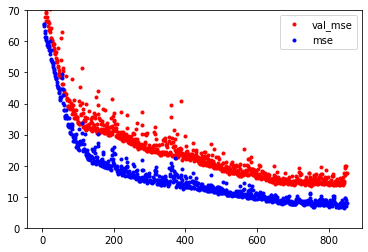

In [10]:
plt.plot(x_len, y_vmse, "o", c="red", markersize=3, label='val_mse')
plt.plot(x_len, y_mse, "o", c="blue", markersize=3, label='mse')

plt.legend()
plt.ylim(0, 70)  

plt.show()